In [1]:
#yfinance is a popular Python library used for downloading historical market data from Yahoo Finance.
#It simplifies the process of accessing financial data for various securities, including stocks, commodities, cryptocurrencies, and more

!pip install yfinance

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1

In [2]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#from sklearn import metrics
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
#The code fetches historical price data for Bitcoin, Ethereum, Tether, and Binance Coin for the past 5 years and keeps only the Close and Volume columns for each of these cryptocurrencies.
#This cleaned data can then be used for further analysis or machine learning tasks, such as predicting future prices.


btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)


In [4]:
#The parameters lsuffix and rsuffix in the join method are used to add suffixes to overlapping column names when joining two DataFrames
# This is necessary to avoid column name conflicts when the two DataFrames have columns with the same name.

p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [5]:
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2021-01-17 00:00:00+00:00,35791.277344,52359854336,1230.172241,29258032819,1.000414,91132972168,45.684612,664875513
2021-01-18 00:00:00+00:00,36630.074219,49511702429,1257.279541,25817455560,1.000804,81024209658,45.353172,586905636
2021-01-19 00:00:00+00:00,36069.804688,57244195486,1377.295898,47195935190,1.000436,103734629698,42.785534,750638729
2021-01-20 00:00:00+00:00,35547.750000,66834573161,1382.274048,46784030909,1.000686,115893865966,42.606899,684094133
2021-01-21 00:00:00+00:00,30825.699219,75643067688,1121.570923,45932464754,0.999696,125636003892,38.645840,621983627


In [6]:
data.tail()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2026-01-13 00:00:00+00:00,95321.781250,54980674354,3322.095459,27237310134,0.999366,112113067779,942.460083,3312675690
2026-01-14 00:00:00+00:00,96929.328125,60592490863,3354.722656,33926411912,0.999941,126519673131,949.108887,2898477115
2026-01-15 00:00:00+00:00,95551.187500,53086363027,3317.101318,27598686935,0.999644,107358143555,930.878357,2344675895
2026-01-16 00:00:00+00:00,95525.117188,33248170537,3295.482178,22732887284,0.999513,75532025352,937.531860,1873697028
2026-01-17 00:00:00+00:00,95255.242188,25426745344,3301.244873,19860051968,0.999530,62105313280,942.884644,1785675904


In [7]:
data.shape

(1827, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2021-01-17 00:00:00+00:00 to 2026-01-17 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1827 non-null   float64
 1   Volume (BTC)   1827 non-null   int64  
 2   Close (ETH)    1827 non-null   float64
 3   Volume (ETH)   1827 non-null   int64  
 4   Close (USDT)   1827 non-null   float64
 5   Volume (USDT)  1827 non-null   int64  
 6   Close (BNB)    1827 non-null   float64
 7   Volume (BNB)   1827 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.5 KB


In [9]:
data.isna().sum()

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [10]:
data.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03
mean,54942.430765,3.685878e+10,2553.352187,1.938547e+10,1.000136,7.066457e+10,464.813506,1.858369e+09
std,29628.035083,2.277270e+10,903.370335,1.280126e+10,0.000709,4.487104e+10,221.457154,1.473458e+09
min,15787.284180,5.331173e+09,993.636780,2.081626e+09,0.995872,9.989859e+09,38.645840,2.038465e+08
25%,29412.204102,2.128563e+10,1800.560974,1.024022e+10,0.999884,4.007070e+10,289.805679,9.097059e+08
50%,47047.003906,3.174426e+10,2476.523193,1.640316e+10,1.000137,6.028288e+10,406.632812,1.613874e+09
75%,69933.285156,4.640953e+10,3242.575195,2.467249e+10,1.000377,8.766258e+10,601.773010,2.219307e+09
max,124752.531250,3.509679e+11,4831.348633,9.773662e+10,1.011530,3.443980e+11,1310.214355,1.798295e+10


In [12]:
#Exploratory Data Analysis

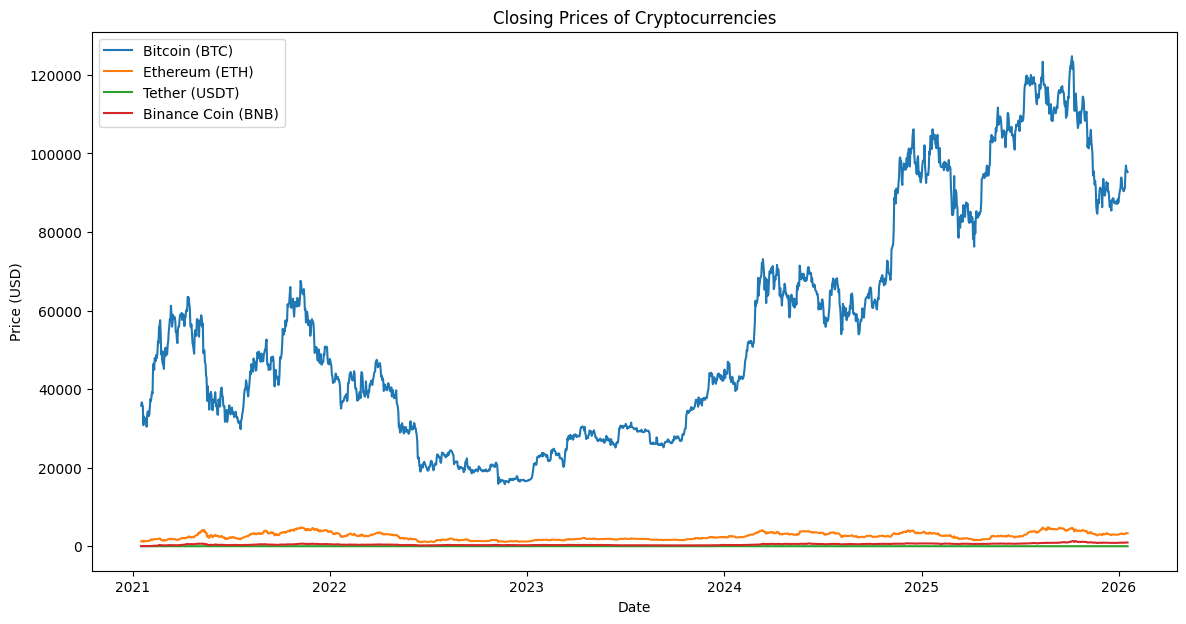

In [13]:
#Visualize the Closing Prices
# create a line plot to visualize the closing prices of all four cryptocurrencies over time:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Close (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Close (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Close (BNB)'], label='Binance Coin (BNB)')
plt.title('Closing Prices of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


<Axes: xlabel='Date'>

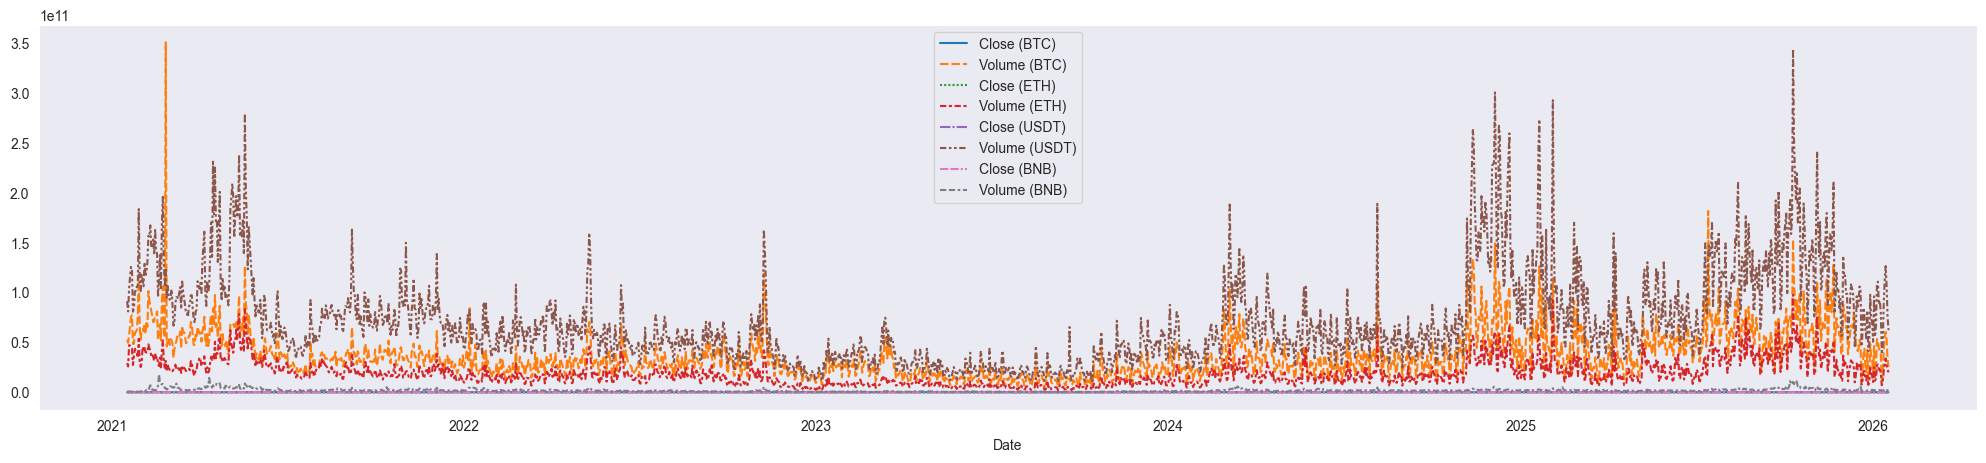

In [14]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

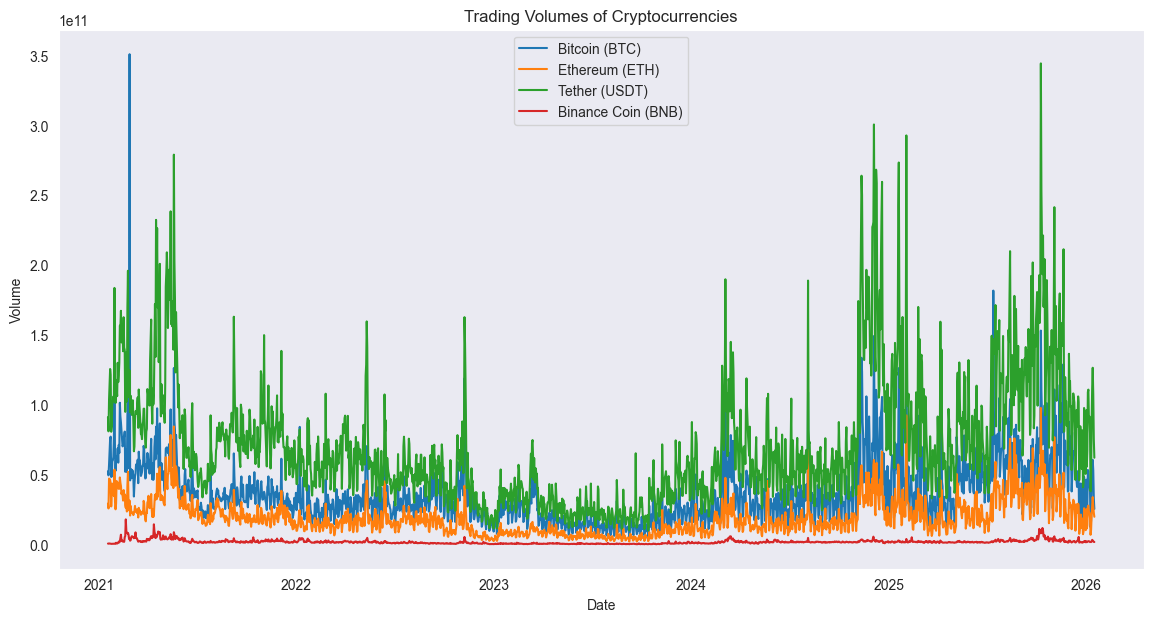

In [15]:
# Visualize the Trading Volumes
#Let's visualize the trading volumes of all four cryptocurrencies:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volume (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Volume (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Volume (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Volume (BNB)'], label='Binance Coin (BNB)')
plt.title('Trading Volumes of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


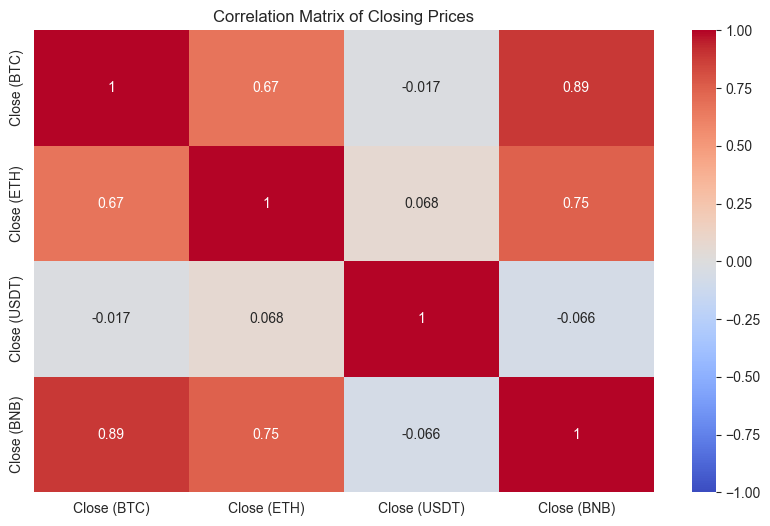

In [16]:
#Correlation Analysis
#We'll analyze the correlation between the closing prices of the cryptocurrencies:
# Calculate the correlation matrix
corr_matrix = data[['Close (BTC)', 'Close (ETH)', 'Close (USDT)', 'Close (BNB)']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Closing Prices')
plt.show()


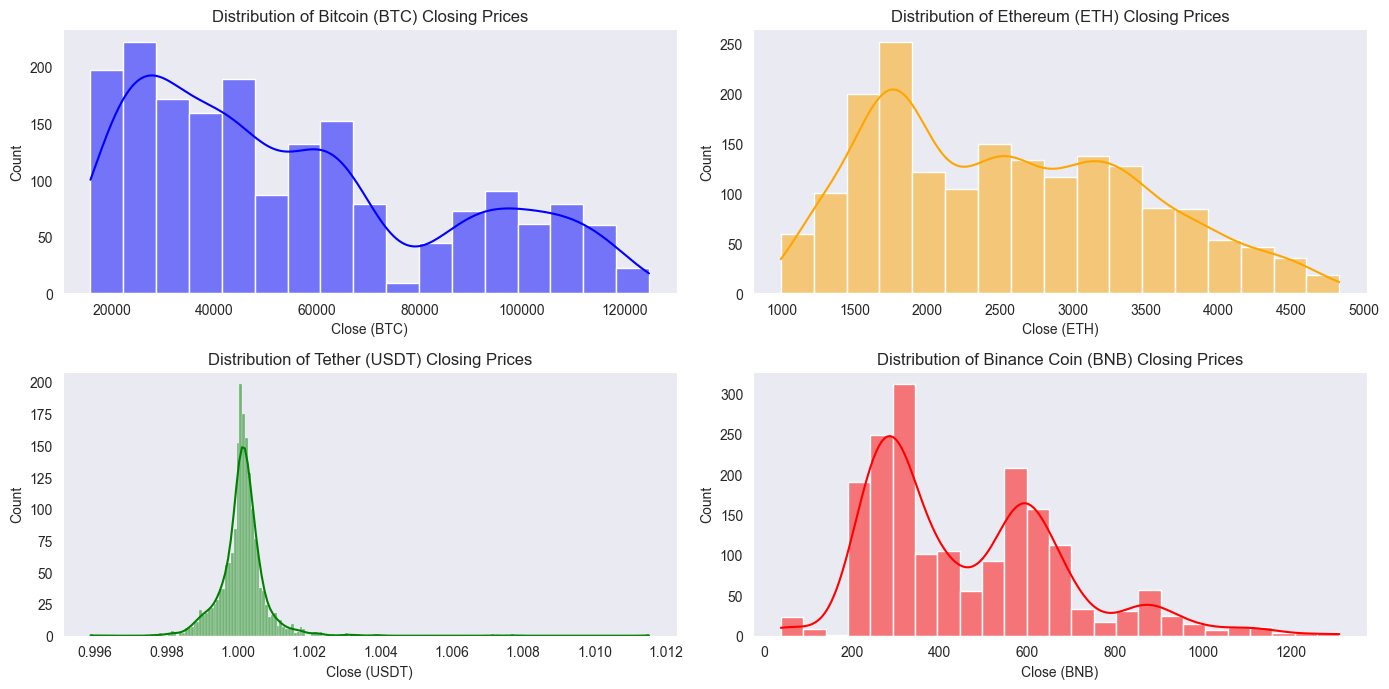

In [17]:
# Distribution of Closing Prices
#Let's plot the distribution of closing prices for each cryptocurrency:
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
sns.histplot(data['Close (BTC)'], kde=True, color='blue')
plt.title('Distribution of Bitcoin (BTC) Closing Prices')

plt.subplot(2, 2, 2)
sns.histplot(data['Close (ETH)'], kde=True, color='orange')
plt.title('Distribution of Ethereum (ETH) Closing Prices')

plt.subplot(2, 2, 3)
sns.histplot(data['Close (USDT)'], kde=True, color='green')
plt.title('Distribution of Tether (USDT) Closing Prices')

plt.subplot(2, 2, 4)
sns.histplot(data['Close (BNB)'], kde=True, color='red')
plt.title('Distribution of Binance Coin (BNB) Closing Prices')

plt.tight_layout()
plt.show()


array([[<Axes: title={'center': 'Close (BTC)'}>,
        <Axes: title={'center': 'Volume (BTC)'}>,
        <Axes: title={'center': 'Close (ETH)'}>,
        <Axes: title={'center': 'Volume (ETH)'}>],
       [<Axes: title={'center': 'Close (USDT)'}>,
        <Axes: title={'center': 'Volume (USDT)'}>,
        <Axes: title={'center': 'Close (BNB)'}>,
        <Axes: title={'center': 'Volume (BNB)'}>]], dtype=object)

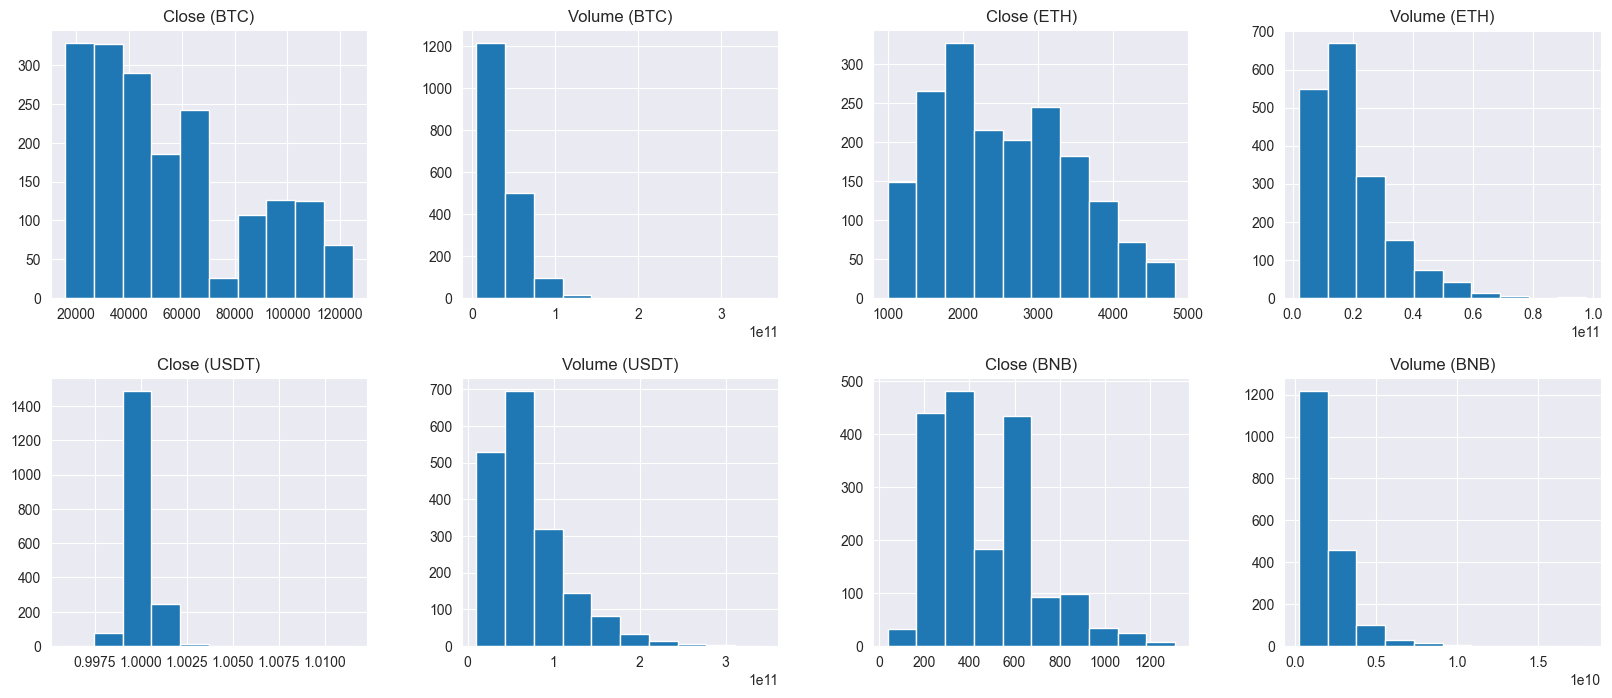

In [18]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

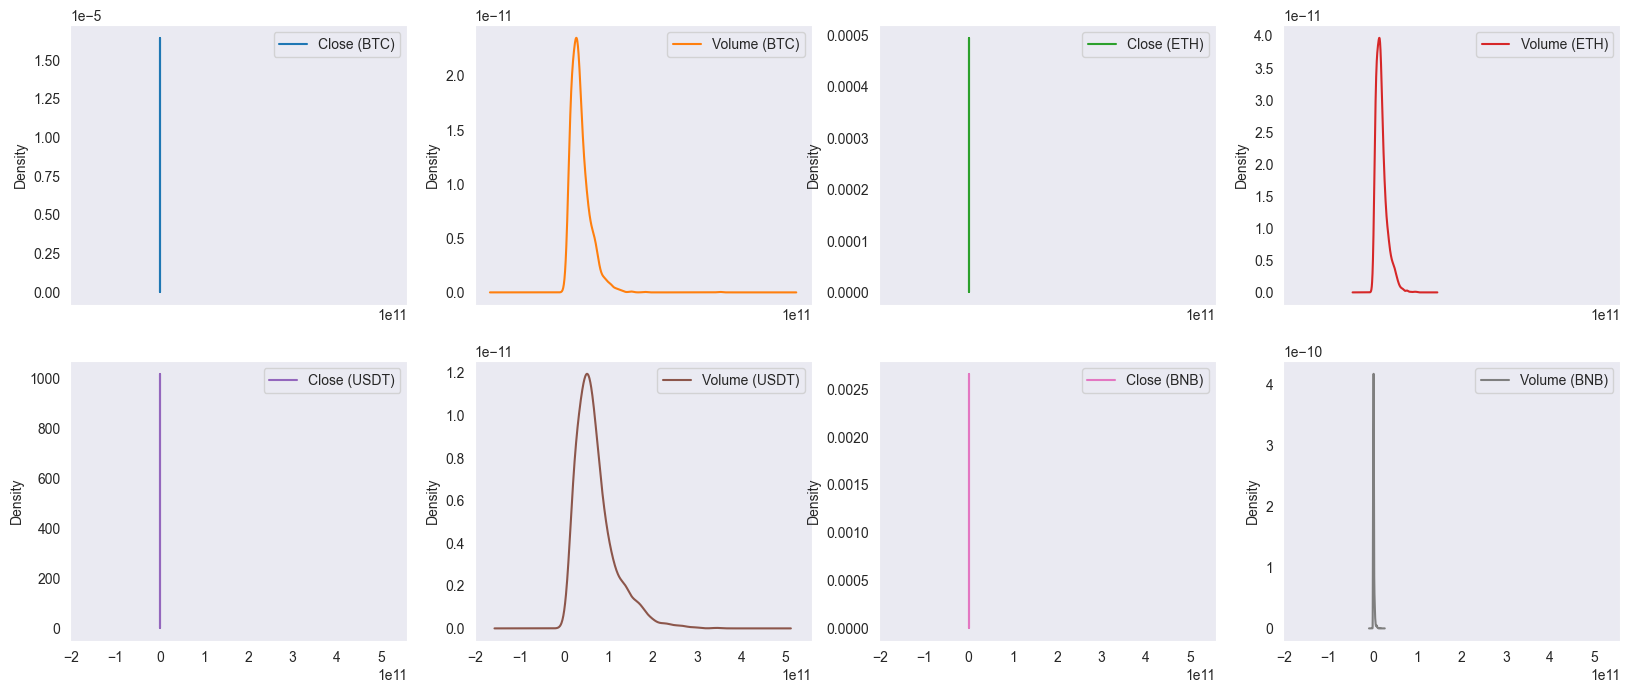

In [19]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

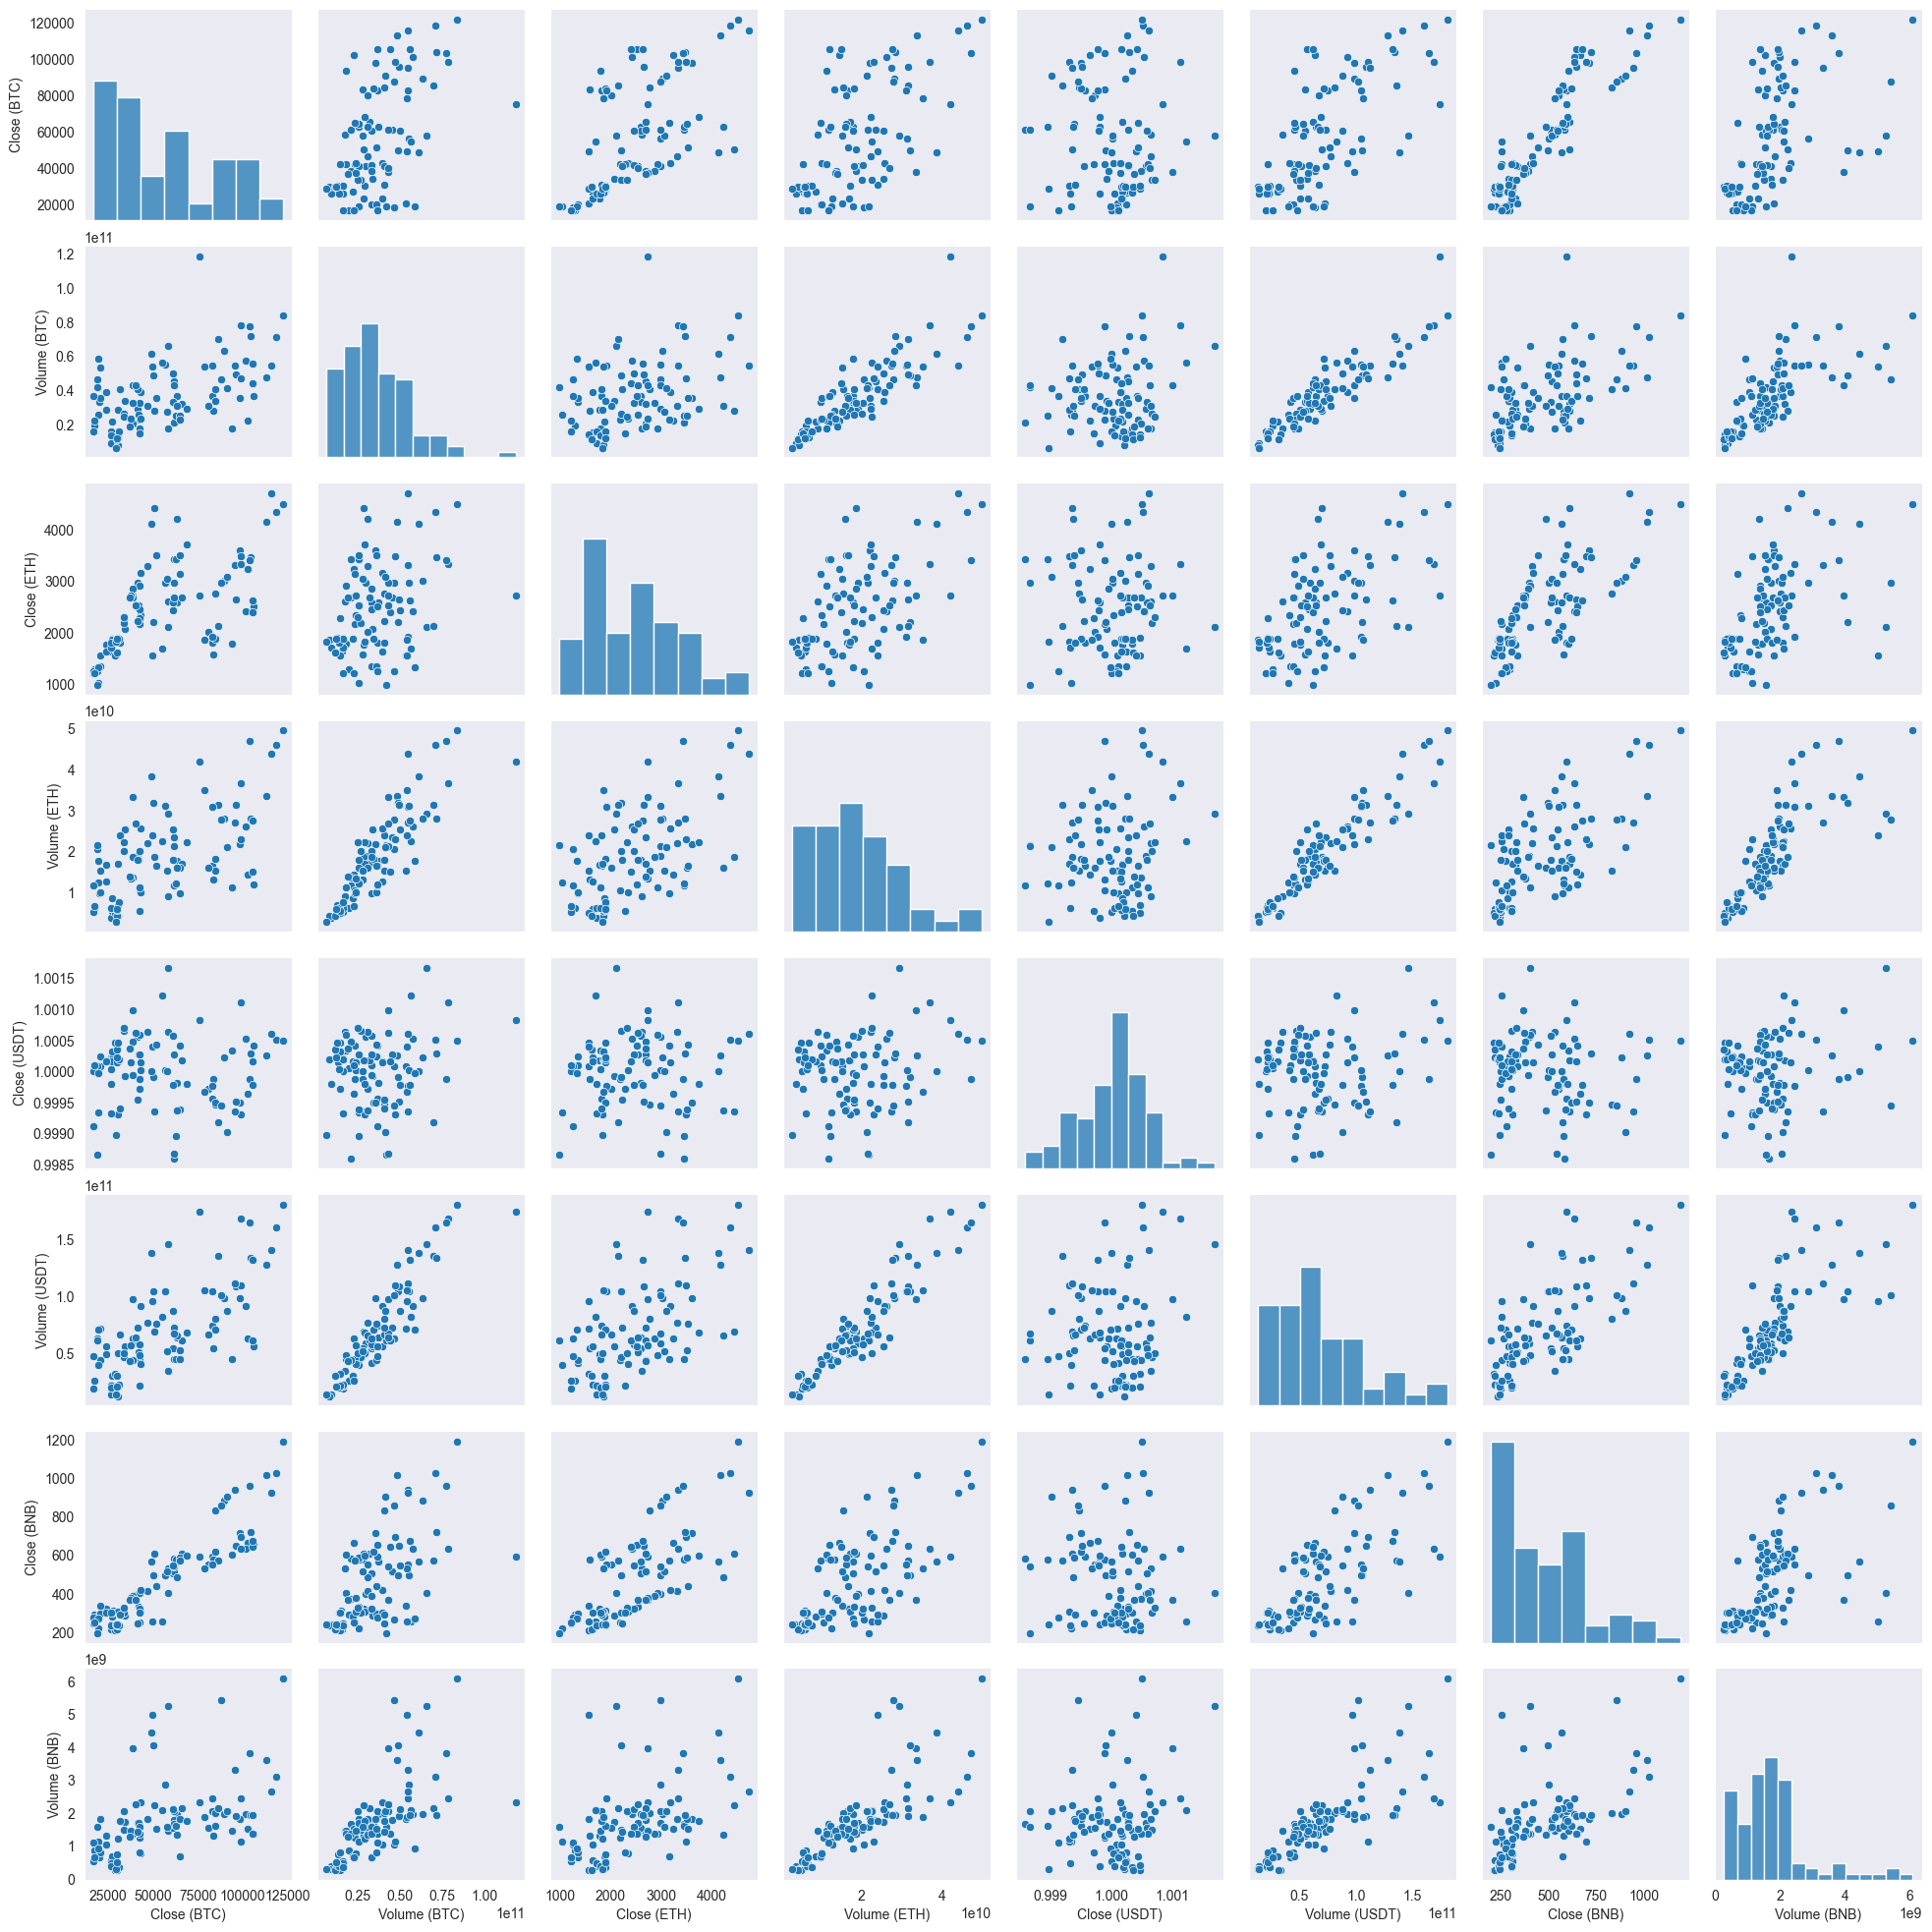

In [20]:
sns.pairplot(data.sample(n=100));

#Data Pre-processing

In [21]:
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [22]:
X.head()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2021-01-17 00:00:00+00:00,52359854336,1230.172241,29258032819,1.000414,91132972168,45.684612,664875513
2021-01-18 00:00:00+00:00,49511702429,1257.279541,25817455560,1.000804,81024209658,45.353172,586905636
2021-01-19 00:00:00+00:00,57244195486,1377.295898,47195935190,1.000436,103734629698,42.785534,750638729
2021-01-20 00:00:00+00:00,66834573161,1382.274048,46784030909,1.000686,115893865966,42.606899,684094133
2021-01-21 00:00:00+00:00,75643067688,1121.570923,45932464754,0.999696,125636003892,38.645840,621983627


In [23]:
X.tail()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2026-01-13 00:00:00+00:00,54980674354,3322.095459,27237310134,0.999366,112113067779,942.460083,3312675690
2026-01-14 00:00:00+00:00,60592490863,3354.722656,33926411912,0.999941,126519673131,949.108887,2898477115
2026-01-15 00:00:00+00:00,53086363027,3317.101318,27598686935,0.999644,107358143555,930.878357,2344675895
2026-01-16 00:00:00+00:00,33248170537,3295.482178,22732887284,0.999513,75532025352,937.531860,1873697028
2026-01-17 00:00:00+00:00,25426745344,3301.244873,19860051968,0.999530,62105313280,942.884644,1785675904


In [24]:
Y.head()


Date
2021-01-17 00:00:00+00:00    35791.277344
2021-01-18 00:00:00+00:00    36630.074219
2021-01-19 00:00:00+00:00    36069.804688
2021-01-20 00:00:00+00:00    35547.750000
2021-01-21 00:00:00+00:00    30825.699219
Name: Close (BTC), dtype: float64

In [25]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [26]:
# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {Y_train.shape}')
print(f'y_test shape: {Y_test.shape}')

X_train shape: (1461, 7)
X_test shape: (366, 7)
y_train shape: (1461,)
y_test shape: (366,)


In [27]:
#SelectKBest
#SelectKBest is a feature selection method provided by scikit-learn (sklearn) that selects the top k features based on a specified scoring function.
#This function evaluates each feature independently and selects those that have the strongest relationship with the target variable.

#Parameters
#k: Specifies the number of top features to select. In your case, k=4 indicates that you want to select the top 4 features

from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [28]:
mask = fs.get_support()
selected_features = X.columns[mask]
print("Selected Features:", selected_features) 

Selected Features: Index(['Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)'], dtype='object')


In [29]:
X_train

array([[1.00003397e+00, 6.89559582e+10, 4.72022400e+02, 2.48681934e+09],
       [1.00032103e+00, 8.61578163e+10, 4.90068726e+02, 2.30358759e+09],
       [1.00004995e+00, 3.90151659e+10, 2.75135376e+02, 8.18302597e+08],
       ...,
       [1.00005603e+00, 1.22494777e+11, 8.22018555e+02, 3.44841023e+09],
       [1.00028896e+00, 5.74898269e+10, 2.87536133e+02, 1.57890533e+09],
       [1.00006497e+00, 2.63807773e+10, 2.93527496e+02, 8.54253818e+08]],
      shape=(1461, 4))

In [30]:
#MinMaxScaler is a preprocessing method in scikit-learn that transforms features by scaling them to a specified range.
# It's often used when your data needs to be normalized within a specific range to ensure all features contribute equally to the analysis.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# implementation of 10 different regression algorithms using scikit-learn. Each algorithm is trained and evaluated on a sample dataset:

#Import Libraries and Generate Sample Data

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

----- Linear Regression -----
Mean Squared Error (MSE): 144997672.1910648
R-squared: 0.8323387566554588

----- Ridge Regression -----
Mean Squared Error (MSE): 143774431.9691368
R-squared: 0.8337531929937694

----- Lasso Regression -----
Mean Squared Error (MSE): 144936191.54592505
R-squared: 0.8324098469098744

----- ElasticNet Regression -----
Mean Squared Error (MSE): 756739002.9444709
R-squared: 0.12498042069397475

----- Support Vector Regression (SVR) -----
Mean Squared Error (MSE): 904559971.522496
R-squared: -0.045945408732639414

----- Decision Tree Regression -----
Mean Squared Error (MSE): 93556770.66636558
R-squared: 0.8918200254101074

----- Random Forest Regression -----
Mean Squared Error (MSE): 40905744.7491213
R-squared: 0.9527005646302041

----- Gradient Boosting Regression -----
Mean Squared Error (MSE): 48292466.52783916
R-squared: 0.9441592760774603

----- K-Nearest Neighbors Regression -----
Mean Squared Error (MSE): 47679617.94353554
R-squared: 0.9448679147340237

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


----- Neural Network Regression (MLP) -----
Mean Squared Error (MSE): 501541709.3170293
R-squared: 0.4200658169019801

                             Model           MSE  R-squared
0                Linear Regression  1.449977e+08   0.832339
1                 Ridge Regression  1.437744e+08   0.833753
2                 Lasso Regression  1.449362e+08   0.832410
3            ElasticNet Regression  7.567390e+08   0.124980
4  Support Vector Regression (SVR)  9.045600e+08  -0.045945
5         Decision Tree Regression  9.355677e+07   0.891820
6         Random Forest Regression  4.090574e+07   0.952701
7     Gradient Boosting Regression  4.829247e+07   0.944159
8   K-Nearest Neighbors Regression  4.767962e+07   0.944868
9  Neural Network Regression (MLP)  5.015417e+08   0.420066


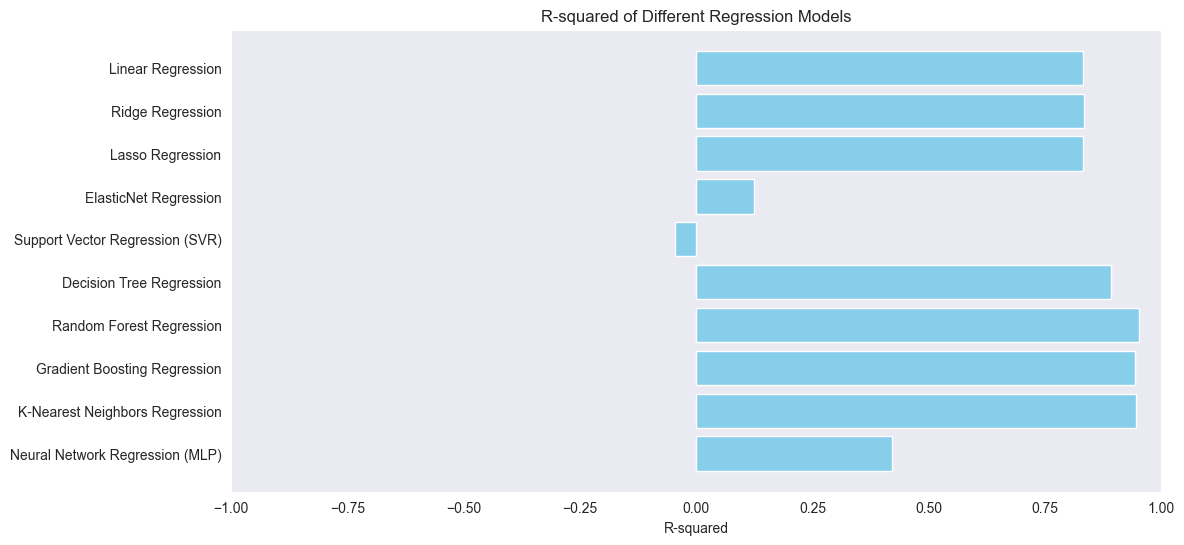

In [32]:
#Define Models and Perform Training and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Support Vector Regression (SVR)': SVR(kernel='rbf'),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5),
    'Neural Network Regression (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
}

# Train and evaluate each model
results = {'Model': [], 'MSE': [], 'R-squared': []}

for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on test set
    Y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Store results
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)

    # Print results
    print(f"----- {name} -----")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")
    print()

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.title('R-squared of Different Regression Models')
plt.xlim(-1, 1)
plt.gca().invert_yaxis()
plt.show()


In [33]:
#Random Forest Regression is a powerful and versatile algorithm suitable for various regression tasks, offering robust performance and the ability to handle complex data relationships

In [34]:
#Saving the Model

In [35]:
import pickle
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
X, Y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=0)


# Scale the features (optional but recommended for some algorithms)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
model_rf.fit(X_train, Y_train)

# Save the model to a file
filename = 'random_forest_model.pkl'
pickle.dump(model_rf, open(filename, 'wb'))

# Save scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Load the model from the file
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the loaded model
Y_pred = loaded_model.predict(X_test)

# Evaluate the loaded model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Loaded Random Forest Regression - Mean Squared Error (MSE): {mse}")
print(f"Loaded Random Forest Regression - R-squared: {r2}")


Loaded Random Forest Regression - Mean Squared Error (MSE): 40250245.80620787
Loaded Random Forest Regression - R-squared: 0.9534585200243781


In [36]:
import os

In [37]:
print(os.getcwd())

c:\Users\DELL\OneDrive\Desktop\My Work\Crypto Analysis
